# ML Project 7 

## Importing Libraries and Data 

In [1]:
import os 
os.chdir("C:/Users/ogulc/ÖNEMLİ ÇALIŞMALAR")

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
#Model kütüphanelerini, modeli kurarken
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
project_7 = pd.read_csv("car_price_prediction.csv")

In [4]:
project_7

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


## Analysing Data

In [5]:
project_7.head(3)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2


In [6]:
project_7.shape

(19237, 18)

### .info()

In [7]:
project_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

### .unique() and .nunique()

In [8]:
project_7["Model"].nunique()

1590

In [9]:
project_7["Category"].nunique()

11

In [10]:
project_7["Fuel type"].nunique()

7

In [11]:
project_7["Gear box type"].nunique()

4

In [12]:
project_7["Drive wheels"].nunique()

3

In [13]:
project_7["Doors"].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [14]:
project_7["Engine volume"].nunique()

107

In [15]:
project_7["Doors"].nunique()

3

### Replacing 'km' with ' ' in `Mileage` Column and .astype()

In [16]:
project_7["Mileage"] = project_7["Mileage"].str.replace("km", "").astype(int)

In [17]:
project_7["Mileage"]

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 19237, dtype: int64

### .count()

In [18]:
project_7.count()

ID                  19237
Price               19237
Levy                19237
Manufacturer        19237
Model               19237
Prod. year          19237
Category            19237
Leather interior    19237
Fuel type           19237
Engine volume       19237
Mileage             19237
Cylinders           19237
Gear box type       19237
Drive wheels        19237
Doors               19237
Wheel               19237
Color               19237
Airbags             19237
dtype: int64

### .isnull().sum() and `Levy` column 

In [19]:
project_7.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

+ Boş sütun olmayabilir ancak `Levy` sütununda **' - '** şeklinde değerler var. Bunları bulmamız lazım

In [20]:
project_7["Levy"].str.contains("-").sum()

np.int64(5819)

In [21]:
project_7[project_7["Levy"].str.contains("-")]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
11,45814819,8781,-,FORD,Transit,1999,Microbus,No,CNG,4,0,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0
12,45815568,3000,-,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000,4.0,Manual,Front,04-May,Left wheel,White,4
23,45814106,7840,-,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000,4.0,Manual,Front,02-Mar,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,44571028,8781,-,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0,4.0,Automatic,Front,04-May,Left wheel,Blue,4
19224,45768089,19130,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800,4.0,Automatic,Front,04-May,Left wheel,Black,12
19226,45796788,7840,-,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000,6.0,Tiptronic,Rear,04-May,Right-hand drive,White,0
19229,39977395,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000,4.0,Automatic,Front,04-May,Left wheel,Silver,6


In [22]:
#Her bir aracın 'Levy = Vergi' kısmını, o aracın üreticisinin ortalamasıyla dolduracağız
project_7['Levy'] = project_7['Levy'].replace('-', np.nan).astype(float)
levy_means = project_7.groupby('Manufacturer')['Levy'].mean()

# Eksik 'Levy' değerlerini üreticinin ortalaması ile dolduralım
project_7['Levy'] = project_7.apply(lambda row: levy_means[row['Manufacturer']] if pd.isna(row['Levy']) else row['Levy'], axis=1)

In [23]:
project_7.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,803.857398,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [24]:
project_7.groupby("Manufacturer")["Levy"].mean()

Manufacturer
ACURA           1113.928571
ALFA ROMEO              NaN
ASTON MARTIN            NaN
AUDI             932.035503
BENTLEY         2819.000000
                   ...     
VAZ              640.000000
VOLKSWAGEN       752.195205
VOLVO           1202.400000
ZAZ                     NaN
სხვა                    NaN
Name: Levy, Length: 65, dtype: float64

In [25]:
project_7.isnull().sum()

ID                   0
Price                0
Levy                43
Manufacturer         0
Model                0
Prod. year           0
Category             0
Leather interior     0
Fuel type            0
Engine volume        0
Mileage              0
Cylinders            0
Gear box type        0
Drive wheels         0
Doors                0
Wheel                0
Color                0
Airbags              0
dtype: int64

In [26]:
project_7 = project_7.dropna()

### `Engine volume` column

In [27]:
project_7["Engine volume"].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [28]:
#Turbo yazılarını temizleyelim
project_7["Engine volume"] = project_7["Engine volume"].str.replace("Turbo", "").astype(float)

C:\Users\ogulc\AppData\Local\Temp\ipykernel_5352\237298093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  project_7["Engine volume"] = project_7["Engine volume"].str.replace("Turbo", "").astype(float)


In [29]:
project_7["Engine volume"]

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 19194, dtype: float64

### .duplicated() and drop_duplicates()

In [30]:
project_7.duplicated().sum()

np.int64(313)

In [31]:
project_7[project_7.duplicated()]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
425,45815372,7840,1281.336581,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2.0,180003,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,850.549209,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,850.549209,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,20385,1281.336581,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,Petrol,5.0,230000,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,8781,850.549209,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273.000000,LEXUS,IS 350,2015,Sedan,Yes,Petrol,3.5,80856,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,15125,642.000000,CHEVROLET,Orlando,2012,Jeep,Yes,Diesel,2.0,156834,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,36065,640.000000,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,2.0,68000,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,13485,645.000000,TOYOTA,Prius,2011,Sedan,No,Hybrid,1.8,281600,6.0,Automatic,Front,04-May,Left wheel,Grey,8


+ Bu satırları python tekrar eden satır olarak algılasa da aslında tekrar etmiyorlar. Bu yüzden bu satırları çıkarmıyoruz.

### .describe()

In [32]:
project_7.describe()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,1.919400e+04,1.919400e+04,19194.000000,19194.000000,19194.000000,1.919400e+04,19194.000000,19194.000000
mean,4.557818e+07,1.857952e+04,929.287451,2010.956914,2.308388,1.421765e+06,4.583255,6.590080
std,9.253526e+05,1.907935e+05,405.355357,5.524298,0.877860,4.591521e+07,1.199686,4.318367
min,2.074688e+07,1.000000e+00,87.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4.569926e+07,5.331000e+03,707.000000,2009.000000,1.800000,7.015675e+04,4.000000,4.000000
50%,4.577226e+07,1.317200e+04,843.000000,2012.000000,2.000000,1.260000e+05,4.000000,6.000000
75%,4.580204e+07,2.223600e+04,1082.299163,2015.000000,2.500000,1.888000e+05,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


### .corr() and heatmap()

<Axes: >

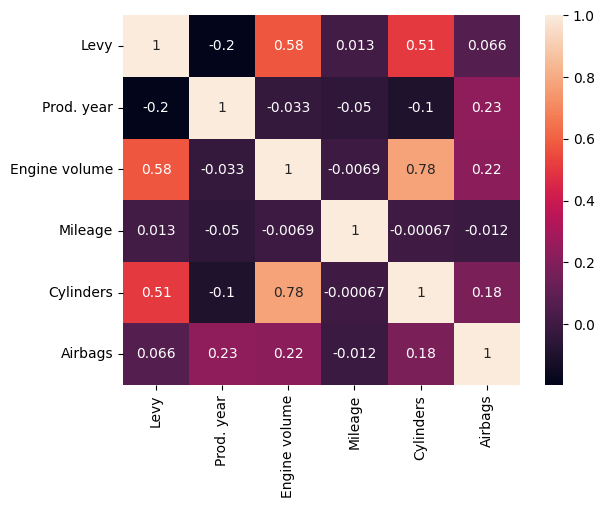

In [33]:
cor = project_7[["Levy", "Prod. year", "Engine volume", "Mileage", "Cylinders", "Airbags"]].corr()
sns.heatmap(cor, annot = True)

+ Sayısal sütunlar arasında kuvvetli bir korelasyon ilişkisi yok (0.8'in üstünde veya -0.8'in altında olacak şekilde). Dolayısıyla bu sütunlar için herhangi bir işleme gerek yok.

## Data Visualization (EDA)

In [34]:
project_7 = project_7.drop(columns = "ID", axis = 1)

In [35]:
project_7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19194 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19194 non-null  int64  
 1   Levy              19194 non-null  float64
 2   Manufacturer      19194 non-null  object 
 3   Model             19194 non-null  object 
 4   Prod. year        19194 non-null  int64  
 5   Category          19194 non-null  object 
 6   Leather interior  19194 non-null  object 
 7   Fuel type         19194 non-null  object 
 8   Engine volume     19194 non-null  float64
 9   Mileage           19194 non-null  int64  
 10  Cylinders         19194 non-null  float64
 11  Gear box type     19194 non-null  object 
 12  Drive wheels      19194 non-null  object 
 13  Doors             19194 non-null  object 
 14  Wheel             19194 non-null  object 
 15  Color             19194 non-null  object 
 16  Airbags           19194 non-null  int64  
dty

In [36]:
project_7.head(2)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8


In [37]:
categorical_columns = project_7.select_dtypes(include = ["object", "category"]).columns.tolist()
numerical_columns = project_7.select_dtypes(include = ["int64", "float64"]).columns.tolist()

In [38]:
numerical_columns

['Price',
 'Levy',
 'Prod. year',
 'Engine volume',
 'Mileage',
 'Cylinders',
 'Airbags']

In [39]:
categorical_columns

['Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

### Graphs of `numerical_columns` 

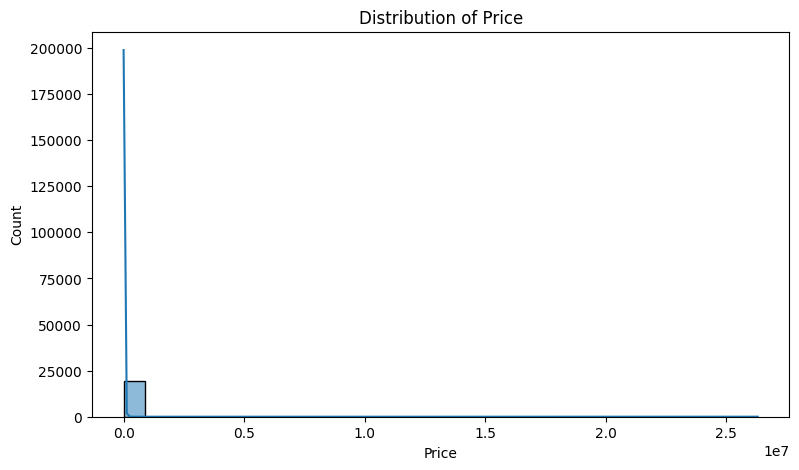

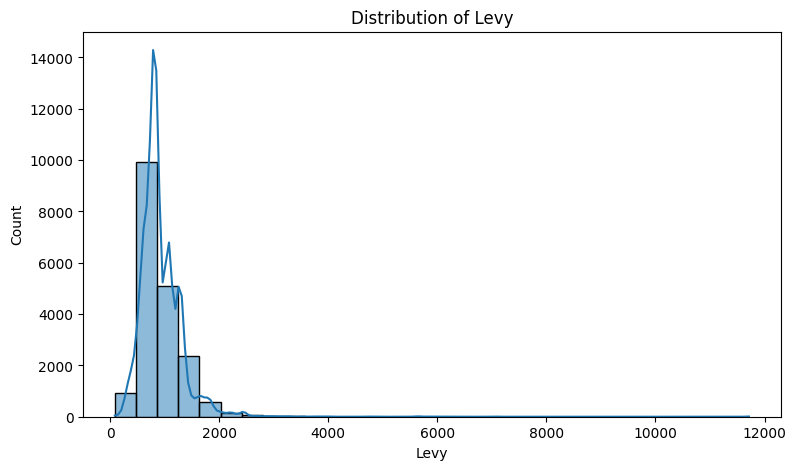

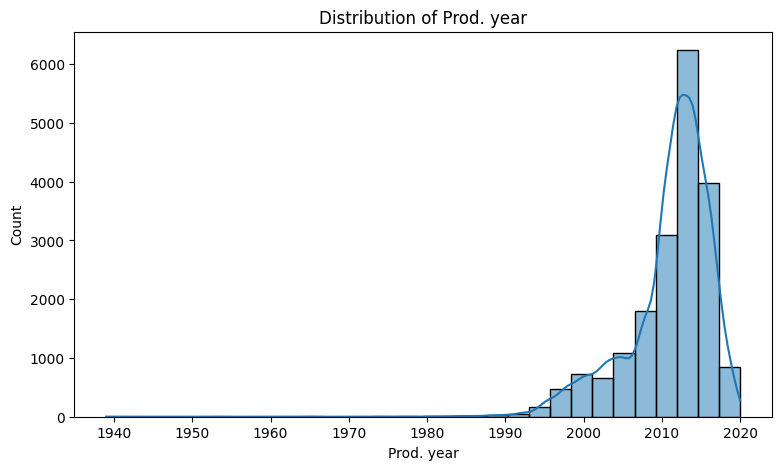

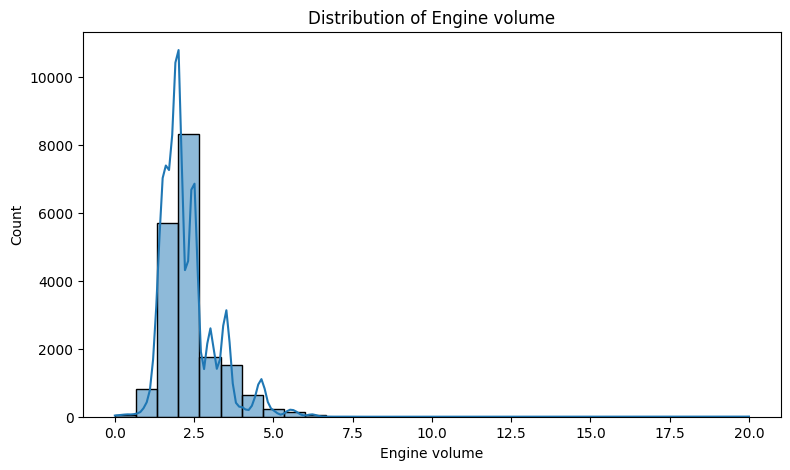

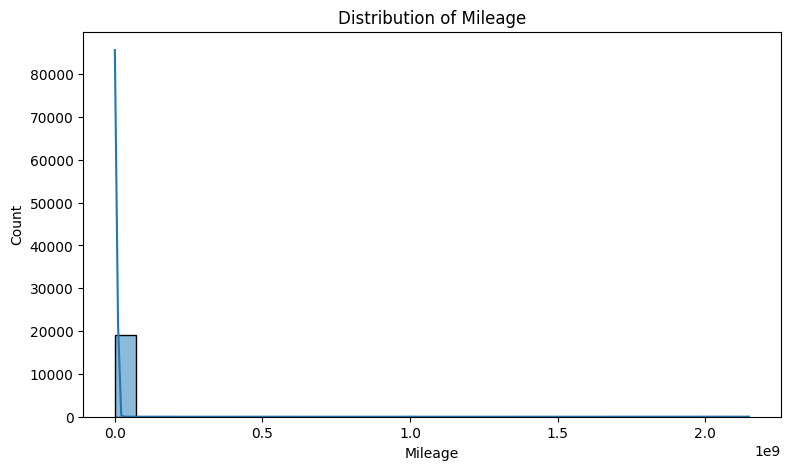

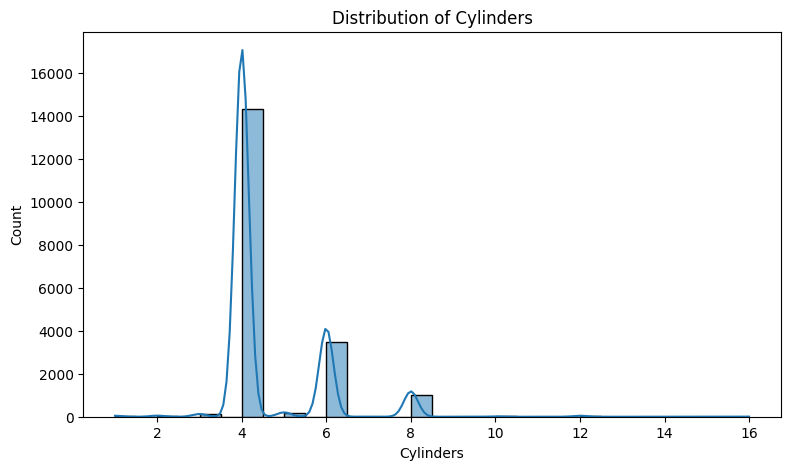

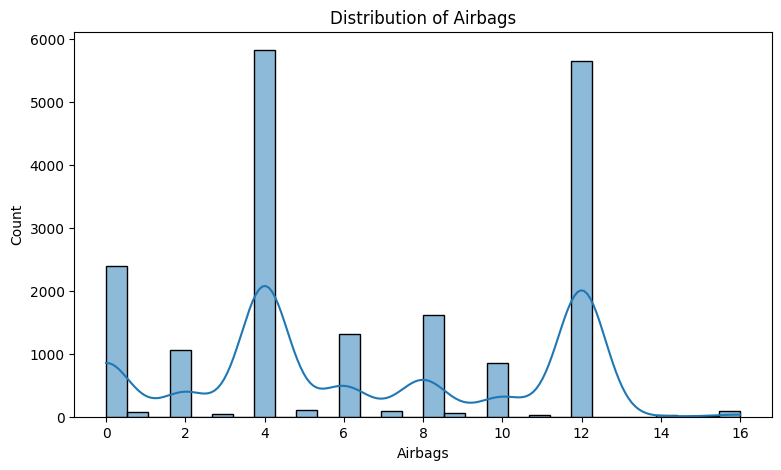

In [40]:
for column in numerical_columns:
    plt.figure(figsize=(9, 5))
    sns.histplot(data=project_7[numerical_columns], x=column, kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

### Graphs of `categorical_columns`

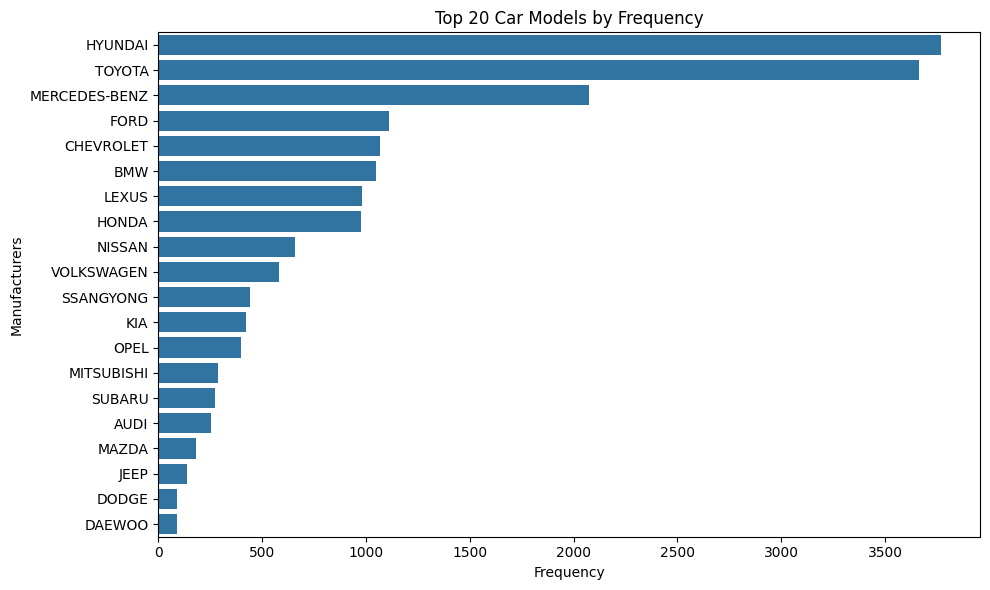

In [41]:
n = 20  # Number of top car models to plot
top_car_models = project_7['Manufacturer'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Manufacturers')
plt.tight_layout()
plt.show()

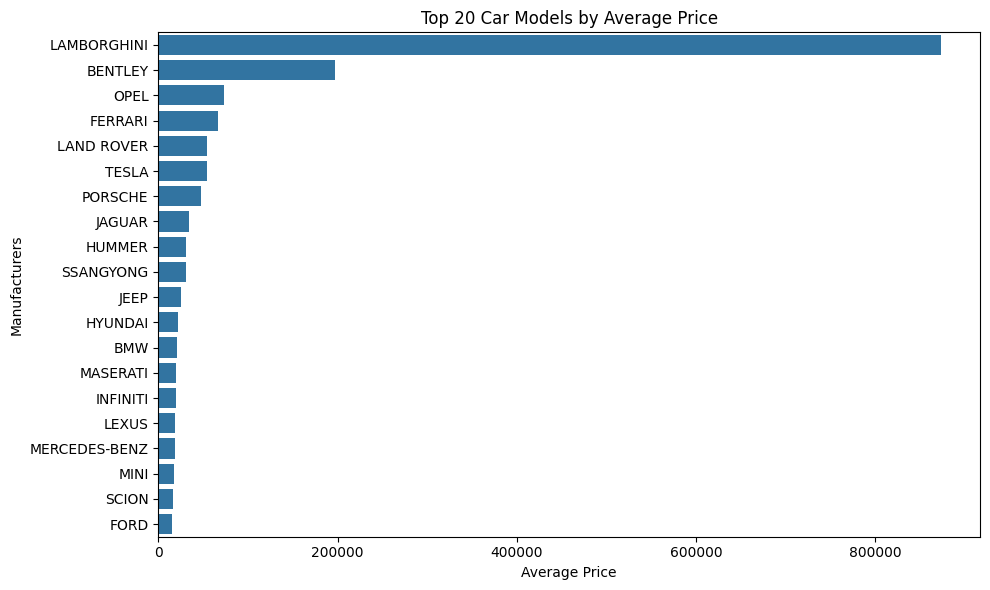

In [42]:
# Calculate average price for each car model
avg_prices_by_car = project_7.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Manufacturers')
plt.tight_layout()
plt.show()

## ChiSquare Test for Corelation Between Categorical Columns and Price Column

In [43]:
from scipy.stats import chi2_contingency
# Sayısal olmayan (kategorik) sütunları seçme
categorical_columns = project_7.select_dtypes(include=['object', 'category']).columns

# Kategorik sütunlar ile Loan_Status arasındaki ilişkiyi chi-square testi ile ölçme
for column in categorical_columns:
    crosstab = pd.crosstab(project_7[column], project_7['Price'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"'{column}' ile 'Price' arasındaki ilişki:")
    print(f"Chi2 Değeri: {chi2}, p-değeri: {p}\n")

'Manufacturer' ile 'Price' arasındaki ilişki:
Chi2 Değeri: 164979.46249412876, p-değeri: 0.0

'Model' ile 'Price' arasındaki ilişki:
Chi2 Değeri: 2994378.249595832, p-değeri: 1.0

'Category' ile 'Price' arasındaki ilişki:
Chi2 Değeri: 37293.17274321834, p-değeri: 0.0

'Leather interior' ile 'Price' arasındaki ilişki:
Chi2 Değeri: 6389.23793568905, p-değeri: 0.0

'Fuel type' ile 'Price' arasındaki ilişki:
Chi2 Değeri: 18165.253747369992, p-değeri: 3.122748290957369e-122

'Gear box type' ile 'Price' arasındaki ilişki:
Chi2 Değeri: 11745.637581905241, p-değeri: 1.9906351602185098e-253

'Drive wheels' ile 'Price' arasındaki ilişki:
Chi2 Değeri: 7413.285326192114, p-değeri: 3.9889080337711427e-134

'Doors' ile 'Price' arasındaki ilişki:
Chi2 Değeri: 4032.8944778810064, p-değeri: 0.9999999999419411

'Wheel' ile 'Price' arasındaki ilişki:
Chi2 Değeri: 4661.633934480235, p-değeri: 1.1424208232034429e-160

'Color' ile 'Price' arasındaki ilişki:
Chi2 Değeri: 38140.34144212828, p-değeri: 4.209440

+ Test sonucuna göre; `Manufacturer`, `Category`, `Leather interior`, `Fuel type`, `Gear box type`, `Drive wheels`, `Wheel` ve `Color` sütunları, **Price** sütunu ile ilişkili çıktı.  Bu sütunları **LabelEncoder**, `Model` ve `Doors` sütunlarını ise **OneHotEncoder** ile işleyeceğiz. `Models` sütununda 1590 adet farklı kategori olduğu için bunu işlememiz mantıklı olmayacaktır. Dolayısıyla bu sütunu kaldırabiliriz. `Doors` sütununda 3 eşsiz değer var, bunu işleyebiliriz.

In [44]:
project_7_enc = project_7.drop(columns = "Model", axis = 1)

In [45]:
project_7_enc.head(2)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8


### LabelEncoder

In [46]:
label_encoder = LabelEncoder()
related_columns = ["Manufacturer", "Category", "Leather interior", "Fuel type", "Gear box type", "Drive wheels", "Wheel", "Color"]
for column in related_columns: 
    project_7_enc[column] = label_encoder.fit_transform(project_7_enc[column].astype(str))

In [47]:
project_7_enc.head(3)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.000000,26,2010,4,1,2,3.5,186005,6.0,0,0,04-May,0,12,12
1,16621,1018.000000,6,2011,4,0,5,3.0,192000,6.0,2,0,04-May,0,1,8
2,8467,803.857398,17,2006,3,0,5,1.3,200000,4.0,3,1,04-May,1,1,2


In [48]:
project_7_enc["Manufacturer"].value_counts()

Manufacturer
19    3769
45    3662
30    2076
14    1111
6     1069
3     1049
26     982
17     977
34     660
47     579
41     441
23     421
35     397
33     289
42     275
1      255
29     183
22     138
11      91
9       91
13      78
43      76
37      54
25      49
46      48
32      48
21      42
38      37
20      30
7       26
40      20
48      19
36      17
4       16
16      15
27      15
0       15
5       14
10      13
15      12
8        9
39       7
18       5
28       4
31       4
12       2
2        2
44       1
24       1
Name: count, dtype: int64

### OneHotEncoder

In [49]:
unrelated_columns = project_7_enc[["Doors"]]
unrelated_columns

,Doors
0,04-May
1,04-May
2,04-May
3,04-May
4,04-May
...,...
19232,02-Mar
19233,04-May
19234,04-May
19235,04-May


In [50]:
one_hot_encoder = OneHotEncoder()
encoded_unrelated = one_hot_encoder.fit_transform(unrelated_columns).toarray()
encoded_unrelated = pd.DataFrame(encoded_unrelated)
encoded_unrelated

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
19189,1.0,0.0,0.0
19190,0.0,1.0,0.0
19191,0.0,1.0,0.0
19192,0.0,1.0,0.0


In [51]:
project_7_enc= project_7_enc.drop(unrelated_columns, axis=1)
project_7_encoded = pd.concat([project_7_enc.reset_index(drop=True), encoded_unrelated.reset_index(drop=True)], axis=1)

In [52]:
project_7_encoded.head(3)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,0,1,2
0,13328,1399.000000,26,2010,4,1,2,3.5,186005,6.0,0,0,0,12,12,0.0,1.0,0.0
1,16621,1018.000000,6,2011,4,0,5,3.0,192000,6.0,2,0,0,1,8,0.0,1.0,0.0
2,8467,803.857398,17,2006,3,0,5,1.3,200000,4.0,3,1,1,1,2,0.0,1.0,0.0


### `project_7_encoded` sütunlarının isimlerini str veri tipine dönüştürüyoruz ki modeli eğitirken hata alınmasın 

In [53]:
project_7_encoded.columns = project_7_encoded.columns.astype(str)

## Seperated `project_7_encoded` Data

In [54]:
X = project_7_encoded.drop(columns = "Price", axis = 1)
y = project_7_encoded["Price"]

In [55]:
X.head(3)

,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,0,1,2
0,1399.000000,26,2010,4,1,2,3.5,186005,6.0,0,0,0,12,12,0.0,1.0,0.0
1,1018.000000,6,2011,4,0,5,3.0,192000,6.0,2,0,0,1,8,0.0,1.0,0.0
2,803.857398,17,2006,3,0,5,1.3,200000,4.0,3,1,1,1,2,0.0,1.0,0.0


In [56]:
y.head(3)

0    13328
1    16621
2     8467
Name: Price, dtype: int64

## Splitting Data 

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
print(X.shape, X_train.shape, X_test.shape)

(19194, 17) (15355, 17) (3839, 17)


In [59]:
print(y.shape, y_train.shape, y_test.shape)

(19194,) (15355,) (3839,)


## Data Standardization with `StandardScaler` (Z-Score Normalization)

In [60]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [61]:
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

## Model Training, Evaluating and Compare with DummyClassifier

In [62]:
from sklearn.dummy import DummyRegressor
dummy_regressor = DummyRegressor(strategy = "mean").fit(X_train_std, y_train)

In [63]:
print("Dummy Regressor'un Test Setindeki Doğruluğu:", dummy_regressor.score(X_test_std, y_test))

Dummy Regressor'un Test Setindeki Doğruluğu: -0.00022326728933008688


+ Dummy Regressor'un test setindeki doğruluk oranı çook çok düşük. Bu da veri setindeki dengesiz dağılım olmadığını gösterir.

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR

In [65]:
regression_models = {"Decision Tree": DecisionTreeRegressor(),
                   "Random Forest": RandomForestRegressor(),
                   "Gradient Boosting": GradientBoostingRegressor(),
                   "Ada Boost": AdaBoostRegressor(),
                   "KNN": KNeighborsRegressor(),
                   "Linear Regression": LinearRegression(),
                   "Lasso Regression": Lasso(),
                   "Ridge Regression": Ridge(),
                   "Linear SVR": SVR(kernel = "linear"),
                   "RBF SVR": SVR(kernel = "rbf"),
                   "Polynomial SVR": SVR(kernel = "poly")}

In [66]:
model_names = []
train_score = []
test_score = []
mse_score = []
r2score = []

for name, reg in regression_models.items():
    reg.fit(X_train_std, y_train)
    predictions = reg.predict(X_test_std)
    score_train = reg.score(X_train_std, y_train)
    score_test = reg.score(X_test_std, y_test)
    score_mse = mean_squared_error(y_test, predictions)
    score_r2 = r2_score(y_test, predictions)
    
    model_names.append(name)
    train_score.append(score_train)
    test_score.append(score_test)
    mse_score.append(score_mse)
    r2score.append(score_r2)
    
    print(f"{name} Train setindeki doğruluk: {score_train}")
    print(f"{name} Test setindeki doğruluk: {score_test}")
    print(f"{name} MSE Skoru: {score_mse}")
    print(f"{name} R^2 Skoru: {score_r2}\n")

Decision Tree Train setindeki doğruluk: 0.9907693820871633
Decision Tree Test setindeki doğruluk: -0.0004861492699645975
Decision Tree MSE Skoru: 180402070823.7079
Decision Tree R^2 Skoru: -0.0004861492699645975

Random Forest Train setindeki doğruluk: 0.9406042279400018
Random Forest Test setindeki doğruluk: 9.38312964168242e-05
Random Forest MSE Skoru: 180297491969.42883
Random Forest R^2 Skoru: 9.38312964168242e-05

Gradient Boosting Train setindeki doğruluk: 0.665547809801905
Gradient Boosting Test setindeki doğruluk: -0.000227564434465366
Gradient Boosting MSE Skoru: 180355444251.37433
Gradient Boosting R^2 Skoru: -0.000227564434465366

Ada Boost Train setindeki doğruluk: -0.07276874037941705
Ada Boost Test setindeki doğruluk: -0.00031829944072980787
Ada Boost MSE Skoru: 180371805080.59543
Ada Boost R^2 Skoru: -0.00031829944072980787

KNN Train setindeki doğruluk: 0.6939620973087366
KNN Test setindeki doğruluk: -3.131132981470941e-05
KNN MSE Skoru: 180320056988.38184
KNN R^2 Skoru

In [ ]:
model_names = []
train_score = []
test_score = []
mse_score = []
r2score = []

for name, reg in regression_models.items():
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)
    score_train = reg.score(X_train, y_train)
    score_test = reg.score(X_test, y_test)
    score_mse = mean_squared_error(y_test, predictions)
    score_r2 = r2_score(y_test, predictions)
    
    model_names.append(name)
    train_score.append(score_train)
    test_score.append(score_test)
    mse_score.append(score_mse)
    r2score.append(score_r2)
    
    print(f"{name} Train setindeki doğruluk: {score_train}")
    print(f"{name} Test setindeki doğruluk: {score_test}")
    print(f"{name} MSE Skoru: {score_mse}")
    print(f"{name} R^2 Skoru: {score_r2}\n")

Decision Tree Train setindeki doğruluk: 0.9907960691024238
Decision Tree Test setindeki doğruluk: -0.00043141968711024603
Decision Tree MSE Skoru: 180392202291.20547
Decision Tree R^2 Skoru: -0.00043141968711024603

Random Forest Train setindeki doğruluk: 0.9415503170271141
Random Forest Test setindeki doğruluk: 9.386721218596072e-05
Random Forest MSE Skoru: 180297485493.29807
Random Forest R^2 Skoru: 9.386721218596072e-05

Gradient Boosting Train setindeki doğruluk: 0.6615856262710331
Gradient Boosting Test setindeki doğruluk: -0.0001864930088668615
Gradient Boosting MSE Skoru: 180348038481.4543
Gradient Boosting R^2 Skoru: -0.0001864930088668615

Ada Boost Train setindeki doğruluk: 0.12869180729039242
Ada Boost Test setindeki doğruluk: -0.00047389701960165453
Ada Boost MSE Skoru: 180399861566.39896
Ada Boost R^2 Skoru: -0.00047389701960165453

KNN Train setindeki doğruluk: 0.40505991519142603
KNN Test setindeki doğruluk: -0.0009179084323960307
KNN MSE Skoru: 180479923222.82062
KNN R^

C:\Users\ogulc\.conda\envs\PR\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.78935e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge Regression Train setindeki doğruluk: 0.17352297731790522
Ridge Regression Test setindeki doğruluk: -0.0002522450327948622
Ridge Regression MSE Skoru: 180359894518.9278
Ridge Regression R^2 Skoru: -0.0002522450327948622

